## target
LLM挖掘用工需求。利用大语言模型总结归纳不同职业岗位的用工需求，构建出不同文科就业岗位的需求特点，并根据需求内容分为相应的就业技能视角，再对技能点进行打分，
1. 通过雷达图进行可视化。
2. 聚类方法分析。
利用大模型得到的评分表进行k-MEANS或者DBSCAN方法进行聚类，归纳总结不同类型的岗位。
 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

In [2]:
content = pd.read_csv("outputs/gpt-3.5-turbo-summary.csv")

score = pd.read_csv("outputs/gpt3.5_turbo_mark.csv")


In [5]:
skills = score.columns[1:]
for i in skills:
    score = score[score[i].notna()]

job_roles = score['工作岗位']
scores = score[skills].T

17


In [6]:
job_positions = scores.iloc[0]  # 提取第一行
scores.columns = job_positions    # 设置新列名
scores = scores[1:] 
                 

In [7]:
skills = skills[1:]

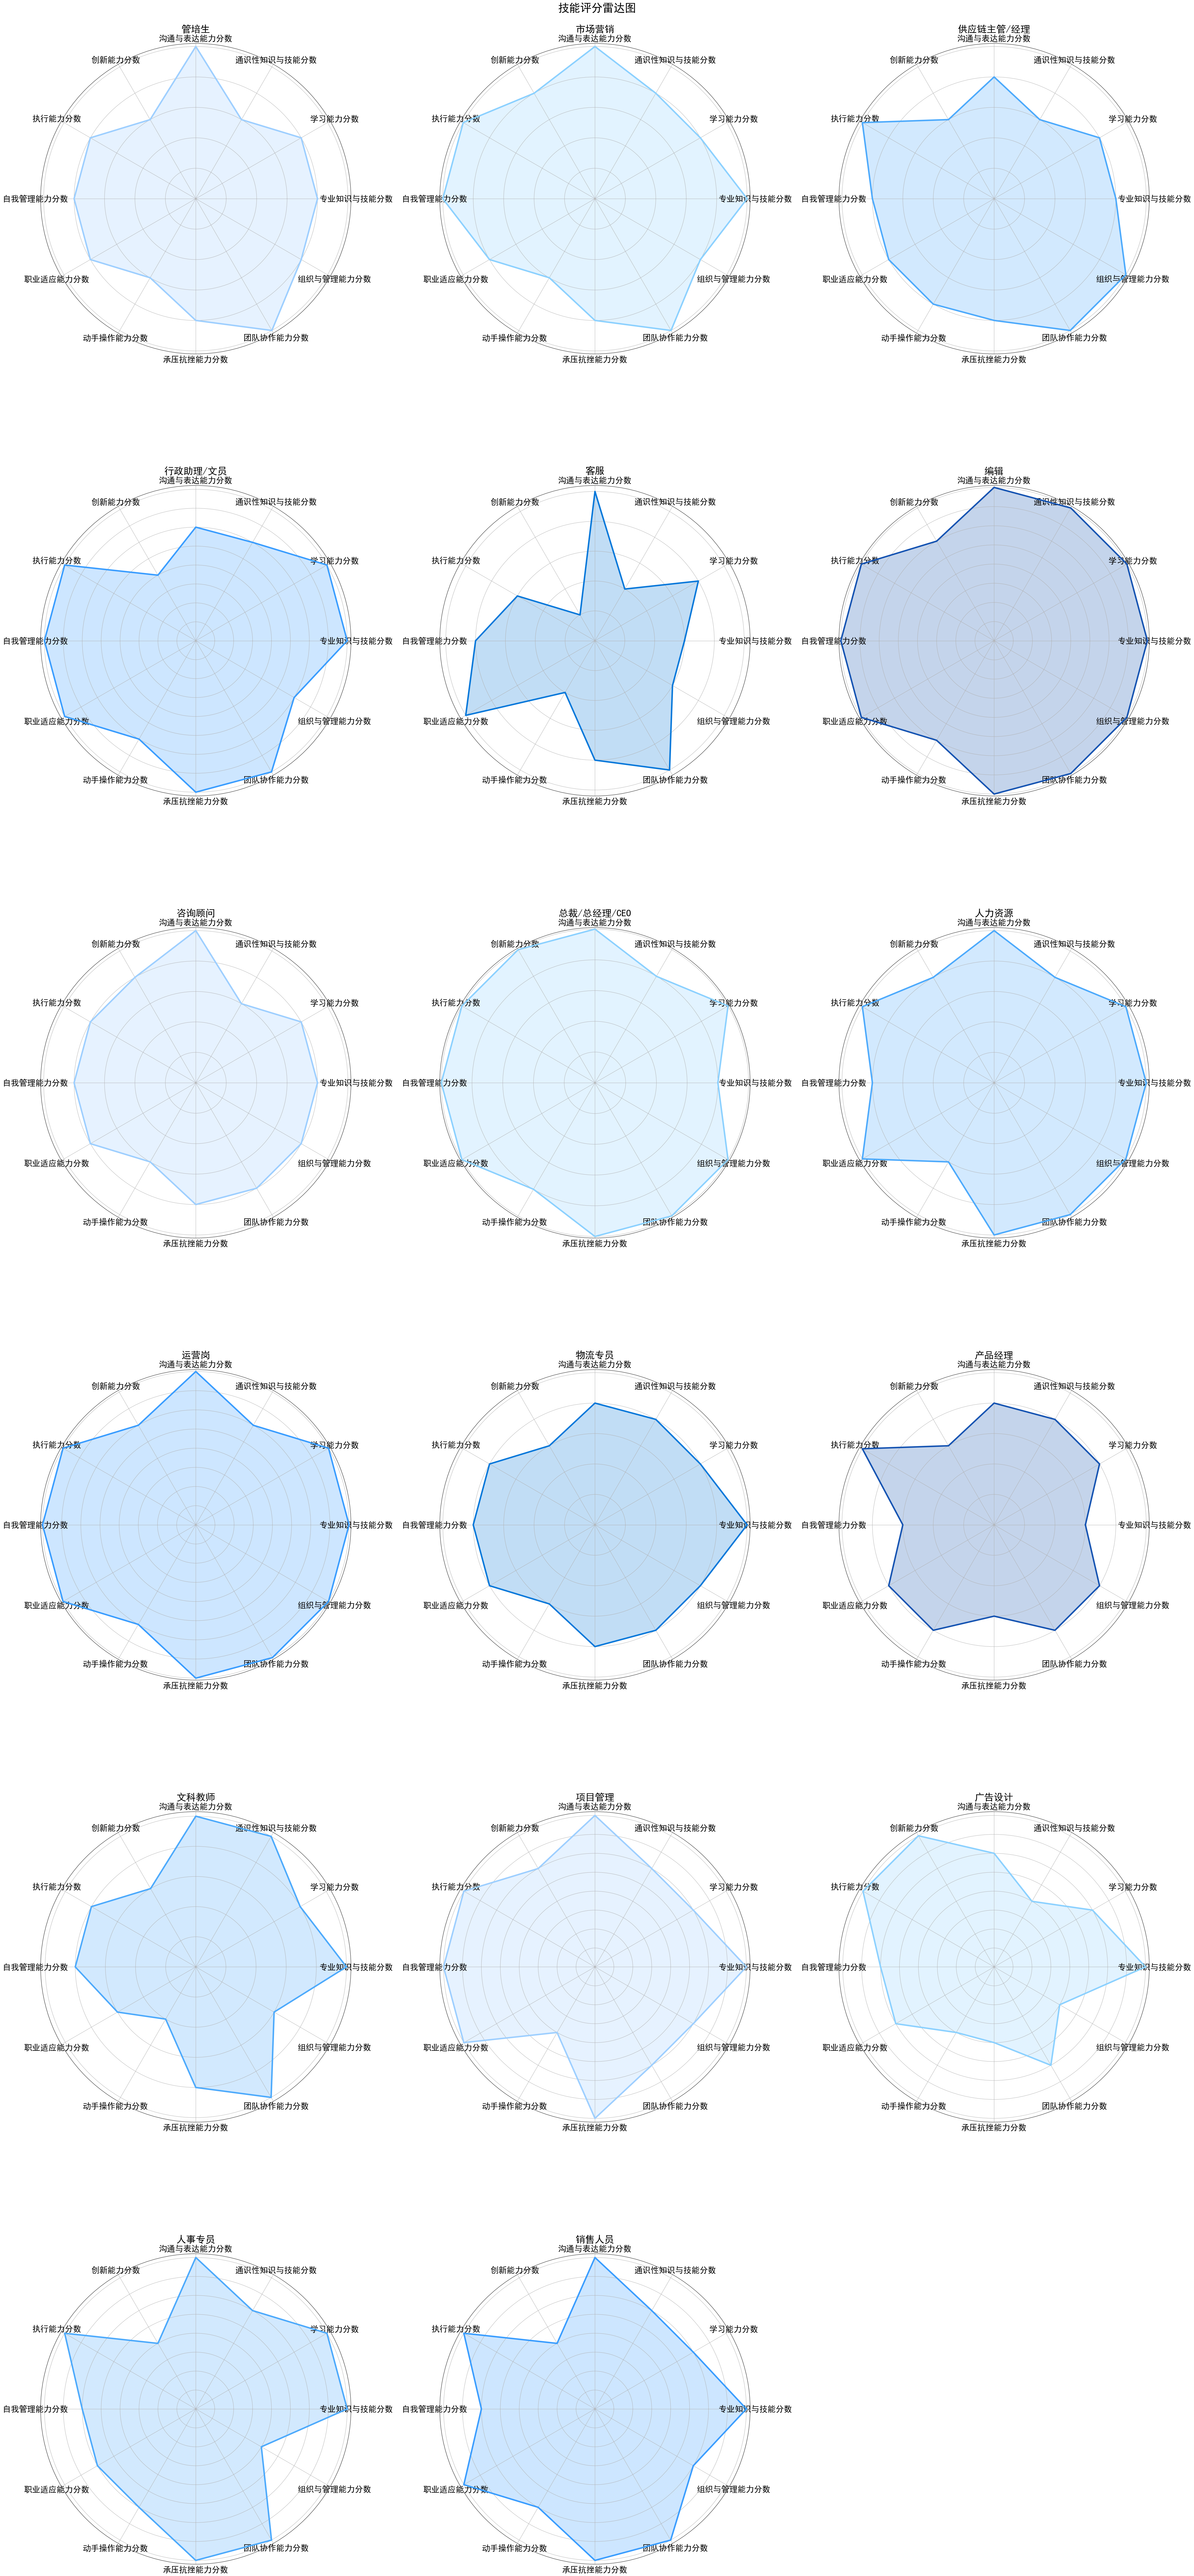

In [21]:
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['font.size'] = 22  # 设置全局字体大小

# 计算雷达图的角度
num_vars = len(skills)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# 闭合的雷达图
angles += angles[:1]  # 闭合

# 17个图，每个图一个颜色
colors = [
    '#9ECFFF', '#8CD1FF', '#4DAAFC', '#3A9DFF', '#0878DA',
    '#1654B2', '#9ECFFF', '#8CD1FF', '#4DAAFC', '#3A9DFF',
    '#0878DA', '#1654B2', '#4DAAFC', '#9ECFFF', '#8CD1FF',
    '#4DAAFC', '#3A9DFF', '#0878DA'
]

# 创建子图，5行4列
nrows, ncols = 6, 3
fig, axs = plt.subplots(nrows, ncols, figsize=(45, 100), subplot_kw=dict(polar=True))

# 绘制每个工作岗位的雷达图
for i, (ax, color, job_role) in enumerate(zip(axs.flatten(), colors, job_roles)):
    score_values = [int(item) for item in scores[job_role].values.flatten().tolist()]
    score_values += score_values[:1]  # 闭合
    ax.fill(angles, score_values, facecolor=color, alpha=0.25)
    ax.plot(angles, score_values, linewidth=4,color=color)
    
    # 添加标签
    ax.set_yticklabels([],fontsize=22)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(skills,fontsize=22)
    ax.set_title(job_role,fontsize=26, fontweight='bold')

# 隐藏多余的子图
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axs.flatten()[j])

plt.suptitle('技能评分雷达图', fontsize=30)
plt.tight_layout()
plt.savefig("outputs/mark.png")
plt.show()